<a href="https://colab.research.google.com/github/dilaraozcerit/NLP/blob/master/NLP_3_(Word_Embedding_(word2vec%2C_Glove))(TR)_26_Mar_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Word_embedding

## Word2Vec

In [ ]:
# pip install gensim

In [ ]:
import numpy as np
from gensim.models import Word2Vec
#from sklearn.manifold import TSNE
#import matplotlib.pyplot as plt

In [ ]:
text = open('newspaper.txt', 'r', encoding='utf8')
text = text.read()
list_sent = text.split('\n')

corpus = []

for sent in list_sent:
    corpus.append(sent.split()) # split defaultumuz boşluk. Boşluklara göre ayırıyor.

In [ ]:
text[:1000]

'iran devlet televizyonu ülkedeki eyaletin sinde yapılan reformcuları protesto amaçlı yürüyüşlere milyonlarca kişinin katıldığını bildirdi \ngösterilerde fitnecilere ölüm münafıklara ölüm abd ye ölüm ingiltere ye ölüm sloganları atıldı \ndini lider ali hamaney ve cumhurbaşkanı mahmud ahmedinejad ı destekleyen iranlılar son olaylarda yeğeni öldürülen mir hüseyin musevi başta olmak üzere muhalefet liderlerini kınadılar \nmusevi ye ölüm ve idam idam sloganları duyuldu \nmuhalefet liderleri kaçtı mı aşure günü yaşanan çatışmalarda devlet kaynaklarına göre u terörist olmak üzere kişi ölmüştü \nden fazla kişinin yaralandığı olaylar sırasında en az kişi tutuklanmıştı \nöte yandan iran haber ajansı irna muhalif liderler mir hüseyin musevi ve mehdi kerrubi nin başkentten kaçarak ülkenin kuzeyine geçtiğini ileri sürdü ancak muhalefet iddiayı yalanladı \nhamaney in bir dönem korumalığını yapan ve şu anda fransa da saklandığı söylenen bir kişinin muhalefete verdiği bilgilere göre münzevi yaşamı na

In [ ]:
list_sent[:10]

['iran devlet televizyonu ülkedeki eyaletin sinde yapılan reformcuları protesto amaçlı yürüyüşlere milyonlarca kişinin katıldığını bildirdi ',
 'gösterilerde fitnecilere ölüm münafıklara ölüm abd ye ölüm ingiltere ye ölüm sloganları atıldı ',
 'dini lider ali hamaney ve cumhurbaşkanı mahmud ahmedinejad ı destekleyen iranlılar son olaylarda yeğeni öldürülen mir hüseyin musevi başta olmak üzere muhalefet liderlerini kınadılar ',
 'musevi ye ölüm ve idam idam sloganları duyuldu ',
 'muhalefet liderleri kaçtı mı aşure günü yaşanan çatışmalarda devlet kaynaklarına göre u terörist olmak üzere kişi ölmüştü ',
 'den fazla kişinin yaralandığı olaylar sırasında en az kişi tutuklanmıştı ',
 'öte yandan iran haber ajansı irna muhalif liderler mir hüseyin musevi ve mehdi kerrubi nin başkentten kaçarak ülkenin kuzeyine geçtiğini ileri sürdü ancak muhalefet iddiayı yalanladı ',
 'hamaney in bir dönem korumalığını yapan ve şu anda fransa da saklandığı söylenen bir kişinin muhalefete verdiği bilgilere 

In [ ]:
list_sent[0].split()

['iran',
 'devlet',
 'televizyonu',
 'ülkedeki',
 'eyaletin',
 'sinde',
 'yapılan',
 'reformcuları',
 'protesto',
 'amaçlı',
 'yürüyüşlere',
 'milyonlarca',
 'kişinin',
 'katıldığını',
 'bildirdi']

In [ ]:
print(corpus[:10])

[['iran', 'devlet', 'televizyonu', 'ülkedeki', 'eyaletin', 'sinde', 'yapılan', 'reformcuları', 'protesto', 'amaçlı', 'yürüyüşlere', 'milyonlarca', 'kişinin', 'katıldığını', 'bildirdi'], ['gösterilerde', 'fitnecilere', 'ölüm', 'münafıklara', 'ölüm', 'abd', 'ye', 'ölüm', 'ingiltere', 'ye', 'ölüm', 'sloganları', 'atıldı'], ['dini', 'lider', 'ali', 'hamaney', 've', 'cumhurbaşkanı', 'mahmud', 'ahmedinejad', 'ı', 'destekleyen', 'iranlılar', 'son', 'olaylarda', 'yeğeni', 'öldürülen', 'mir', 'hüseyin', 'musevi', 'başta', 'olmak', 'üzere', 'muhalefet', 'liderlerini', 'kınadılar'], ['musevi', 'ye', 'ölüm', 've', 'idam', 'idam', 'sloganları', 'duyuldu'], ['muhalefet', 'liderleri', 'kaçtı', 'mı', 'aşure', 'günü', 'yaşanan', 'çatışmalarda', 'devlet', 'kaynaklarına', 'göre', 'u', 'terörist', 'olmak', 'üzere', 'kişi', 'ölmüştü'], ['den', 'fazla', 'kişinin', 'yaralandığı', 'olaylar', 'sırasında', 'en', 'az', 'kişi', 'tutuklanmıştı'], ['öte', 'yandan', 'iran', 'haber', 'ajansı', 'irna', 'muhalif', 'lid

In [ ]:
model = Word2Vec(corpus, size=100, window=5, min_count=5, sg=1)
# size her kelimem için word embedding kaç feature olsun. İSter 50 ister 100 yapın ama genelde 50,100 ve 300.
# sürüm farklılıklarından dolayı size = 100 ---> vector_size = 100 olacak şekilde düzeltme yapılabilir.
# min_count = 5 benim corpusumda 5 veya daha az geçenleri eğitime dahil etme
# sg --> skip gram --> bunun defaultu 0 normalde. sd 0 demek cbow demek
# büyük corpuslarda cbow tercih ediyoruz.

In [ ]:
model.wv['ankara']
# hangi tokene ait word embedding görmek istiyorsam onu yazıyorum. 
# Hepsi 1 ve -1 arasında

array([ 0.28217924,  0.16531119, -0.16471666, -0.05895628, -0.02606362,
        0.00791687,  0.00321149,  0.46223375,  0.1400612 , -0.25810117,
        0.09864391, -0.71330756, -0.26317605, -0.16120598, -0.6148293 ,
        0.10216376, -0.17879976, -0.5341073 , -0.18080308, -0.03437465,
       -0.3629723 , -0.5805339 ,  0.17517376, -0.22676924, -0.10460117,
       -0.14536485, -0.3058267 , -0.09443143, -0.06910472,  0.8208352 ,
        0.44363418,  0.16989139,  0.13532332, -0.03182735,  0.02672669,
       -0.09820661, -0.54740524,  0.2494628 , -0.2121178 ,  0.05324606,
       -0.07193967,  0.65916115, -0.4551725 ,  0.16642651,  0.12621738,
       -0.35641447, -0.14480068,  0.14348252,  0.05410026,  0.50777143,
       -0.28843743, -0.62839353,  0.07999117, -0.02725016,  0.4889934 ,
       -0.10930897,  0.20048201, -0.56499135,  0.85182005,  0.24248925,
       -0.09024525, -0.07321922, -0.03803238,  0.04449771,  0.26287046,
       -0.11018717,  0.37467387,  0.5947802 , -0.44046584,  0.12

In [ ]:
model.wv.most_similar('şey')
# most similar yazdıktan sonra hangi token'i verirsek onunla en çok benzeşen, anlamsal benzerlikleri olan 10 kelimeyi döndürüyor, defaultu 10.

# haberim ve sorunum neden?
# sorunum olan şey.
# demekki bu kelimelerden önce veya sonra 'şey' kelimesi çok gelmiş.
# "hicbir seyden haberim yok."

# burda corpus küçük olduğu için anlamsal benzeşmeler biraz daha sıkıntılı olabilir.

[('birşey', 0.8002350926399231),
 ('şeyin', 0.7672483325004578),
 ('şeyim', 0.7592860460281372),
 ('şeyler', 0.7530828714370728),
 ('şeyle', 0.751874566078186),
 ('şeyimiz', 0.7459698915481567),
 ('şeyi', 0.7346823215484619),
 ('haberim', 0.7239826917648315),
 ('bilgimiz', 0.7219926714897156),
 ('sorunum', 0.7182484865188599)]

In [ ]:
model.wv.most_similar('kırmızı')
# biz bunu gazetelerden topladığımız için mesela ilk sırayı çizgi almış--> "kırmızı çizgi"

[('çizgileri', 0.7133355140686035),
 ('gömlekliler', 0.6443299055099487),
 ('ışıkta', 0.627669095993042),
 ('turuncu', 0.6223363876342773),
 ('bülten', 0.6150221824645996),
 ('gömlekli', 0.6131349802017212),
 ('gömleklilerin', 0.6086685657501221),
 ('bültenle', 0.6041914224624634),
 ('halıdan', 0.5888624787330627),
 ('halıda', 0.5877746939659119)]

In [ ]:
model.wv.most_similar('eve')

[('evine', 0.8499783277511597),
 ('dükkana', 0.776181161403656),
 ('apartmana', 0.7696876525878906),
 ('mağazaya', 0.7625304460525513),
 ('arabaya', 0.7488479614257812),
 ('hapishaneye', 0.7246628999710083),
 ('odasına', 0.7235920429229736),
 ('köye', 0.7233304977416992),
 ('karakola', 0.7176992893218994),
 ('arabadan', 0.7165572643280029)]

In [ ]:
model.wv.most_similar('mavi')

[('marmara', 0.8945493698120117),
 ('baskınıyla', 0.6603778600692749),
 ('gemisine', 0.660006046295166),
 ('baskınına', 0.6463791728019714),
 ('baskınının', 0.6270555853843689),
 ('dökme', 0.6210524439811707),
 ('filosundaki', 0.6188602447509766),
 ('filodaki', 0.6139384508132935),
 ('filo', 0.6117265224456787),
 ('gazze', 0.5938047170639038)]

In [ ]:
model.wv.most_similar(positive=['öğrenme', 'doktor'], negative=['tedavi'], topn=1)
# doktordan tedaviyi çıkardık ve tedaviyi ekledik. Bunun öğretmen olmasını bekleriz ama kaliteli çıkmış. NE alakaa?? Çünkü datamız yetersiz :(

[('kaliteli', 0.6552212238311768)]

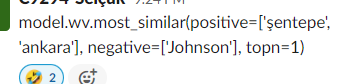

In [ ]:
model.wv.most_similar(positive=['ankara', 'rusya'], negative=['moskova'], topn=1)

[('türkiye', 0.7180782556533813)]

In [ ]:
model.save("word2vec.model")

In [ ]:
model = Word2Vec.load("word2vec.model")

## Glove

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

In [ ]:
glove_model = 'glove.6B.100d.txt' # bunu biz uydurmadık, install bu şekilde edebiliyorduk o yüzden böyle yazdık.
word2vec = 'glove.6B.100d.glove'  # burasına istediğimizi yazabiliriz. burda Johnson hocamız glove yazmış mesela.
glove2word2vec(glove_model, word2vec) # glove modelimiz ve dönüşmesini istediğimiz yeni modeli veriyoruz.
# glove'dan word2vec'e dönüştüyüyor burda.
# 6B.100d -->  6 milyar tokenle eğitilmiş ve her bir token de 100 boyutlu.

(400000, 100)

400000 tane kelimem var.

In [ ]:
model2 = KeyedVectors.load_word2vec_format(word2vec)

Glove modelimiz Ing olduğu için Türkçe kelimeler verirsek hata alırız. Şehir isimlerini bilebiliyor fakat "geldim", "gittim" falan yazarsak ---> ERROR!

In [ ]:
model2['izmir']

array([ 0.0021052, -0.1504   ,  0.44277  , -0.77653  ,  0.049685 ,
        0.36162  , -0.64556  ,  0.031965 ,  0.32785  ,  1.0492   ,
       -0.40957  , -0.43448  ,  0.86788  ,  0.13176  , -0.33421  ,
        0.078688 , -0.44023  , -0.78494  , -0.80508  , -0.053829 ,
        0.21349  , -0.1304   ,  0.55552  ,  0.80507  , -0.54116  ,
        0.14223  , -0.086403 ,  0.049789 ,  0.16237  ,  0.51762  ,
       -0.86124  , -0.35288  ,  0.42465  ,  0.29504  , -0.058929 ,
       -0.042059 , -0.28304  ,  0.68163  , -0.38128  , -0.92071  ,
        0.15022  , -0.48653  , -0.032471 , -1.0217   , -0.2536   ,
        0.32984  ,  0.87331  , -0.25659  ,  0.41713  ,  0.70187  ,
        0.26844  , -0.073702 ,  0.44943  ,  0.37148  , -1.1613   ,
        0.18607  ,  0.22148  , -0.30284  , -0.30314  ,  0.14694  ,
       -0.33141  ,  0.65478  , -0.047409 ,  0.73868  , -0.88869  ,
       -0.10738  , -1.3663   , -0.40605  , -0.84452  ,  0.079424 ,
       -0.57159  , -0.54494  ,  0.88383  ,  0.89814  , -0.6542

In [ ]:
model2.most_similar('ankara')

[('turkey', 0.7512096762657166),
 ('istanbul', 0.6787630915641785),
 ('turkish', 0.6690374612808228),
 ('damascus', 0.6372509002685547),
 ('tbilisi', 0.6322182416915894),
 ('erdogan', 0.6258037686347961),
 ('moscow', 0.6217041015625),
 ('brussels', 0.6181437969207764),
 ('skopje', 0.6164302825927734),
 ('cyprus', 0.606403112411499)]

In [ ]:
model2.most_similar('teacher')
# normalde sözlük bakımından teacher ve instructor daha ilişkili. FAKAT!
# modelimizde kaç kez instructor kaç kez student kullanıyor bu da önemli.
# Ama "instructor" az kullanılmasına rağmen yine de fena değil.

[('student', 0.8083398938179016),
 ('school', 0.75455641746521),
 ('teaching', 0.7521439790725708),
 ('taught', 0.7411845922470093),
 ('teachers', 0.7291542887687683),
 ('graduate', 0.7134960293769836),
 ('instructor', 0.7077120542526245),
 ('students', 0.6828974485397339),
 ('teaches', 0.6552315950393677),
 ('education', 0.6528990268707275)]

Bunu Johnson hocamız BERT modelde denemiş ve skorlarımızdaki benzerlik daha da artmış çünkü BERT 2018'de çıkan daha yeni bir model.

Eğitimi 4 gün süren o data! (2018'de wikipedia'daki datalarla eğitilmiş.)

In [ ]:
model2.most_similar('doctor')

[('physician', 0.7673239707946777),
 ('nurse', 0.75215083360672),
 ('dr.', 0.7175193428993225),
 ('doctors', 0.7080885171890259),
 ('patient', 0.7074184417724609),
 ('medical', 0.6995993256568909),
 ('surgeon', 0.6905338764190674),
 ('hospital', 0.690092921257019),
 ('psychiatrist', 0.658909797668457),
 ('dentist', 0.6447421312332153)]

In [ ]:
model2.most_similar(positive=['woman', 'brother'], negative=['man'], topn=1)

[('daughter', 0.8917792439460754)]

In [ ]:
model2.most_similar(positive=['woman', 'father'], negative=['man'], topn=1)

[('mother', 0.9024620056152344)]

In [ ]:
model2.most_similar(positive=['woman', 'uncle'], negative=['man'], topn=1)

[('aunt', 0.8368030786514282)]

In [ ]:
model2.most_similar(positive=['ankara', 'germany'], negative=['berlin'], topn=1)

[('turkey', 0.8147119283676147)]

In [ ]:
model2.most_similar(positive=['teach', 'doctor'], negative=['treat'], topn=1)

[('teacher', 0.7610154151916504)]

In [ ]:
model2.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

[('queen', 0.7698541283607483)]

In [ ]:
model2.most_similar(positive=['love', 'jealous'], negative=['hate'], topn=1)

[('lover', 0.7032662630081177)]